### **Class distribution**

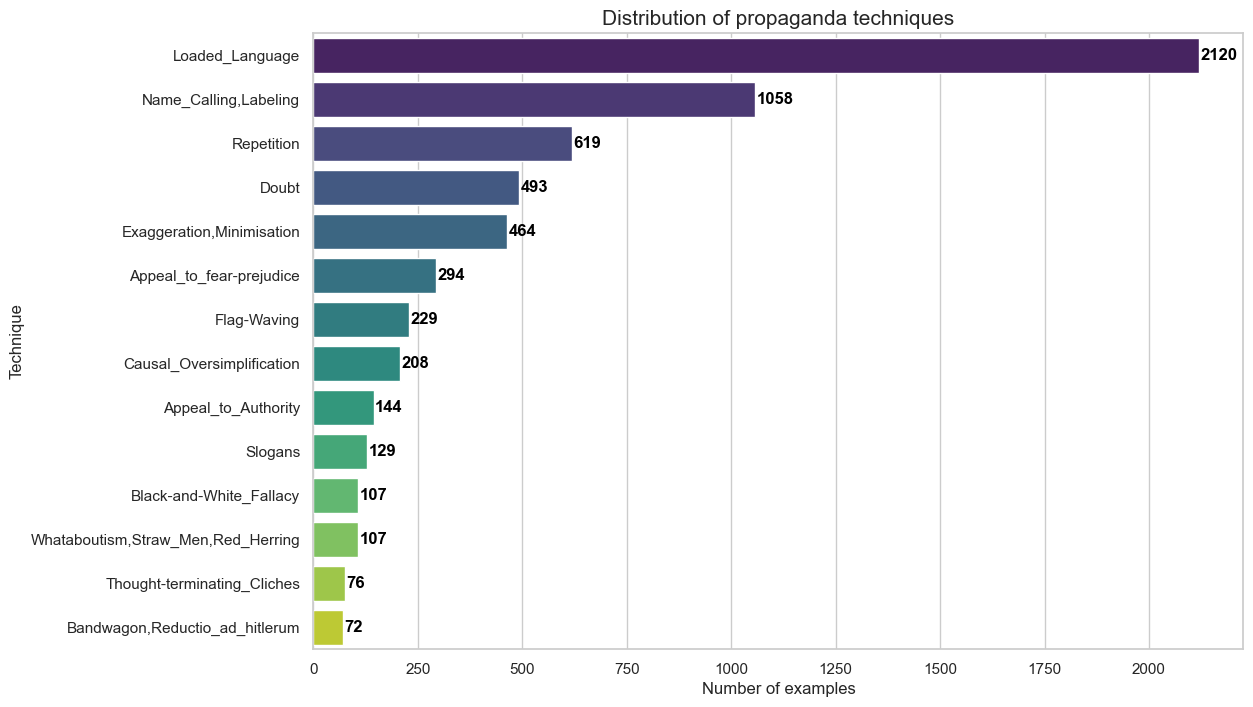

--- Percentage distribution of classes ---
label
Loaded_Language                       34.640523
Name_Calling,Labeling                 17.287582
Repetition                            10.114379
Doubt                                  8.055556
Exaggeration,Minimisation              7.581699
Appeal_to_fear-prejudice               4.803922
Flag-Waving                            3.741830
Causal_Oversimplification              3.398693
Appeal_to_Authority                    2.352941
Slogans                                2.107843
Black-and-White_Fallacy                1.748366
Whataboutism,Straw_Men,Red_Herring     1.748366
Thought-terminating_Cliches            1.241830
Bandwagon,Reductio_ad_hitlerum         1.176471
Name: proportion, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = os.path.join('..', 'data', 'processed', 'dataset.csv')
df = pd.read_csv(path)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

class_counts = df['label'].value_counts()

ax = sns.barplot(x=class_counts.values, y=class_counts.index, hue=class_counts.index, palette="viridis", legend=False)

for i, v in enumerate(class_counts.values):
    ax.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Distribution of propaganda techniques', fontsize=15)
plt.xlabel('Number of examples', fontsize=12)
plt.ylabel('Technique', fontsize=12)
plt.show()

print("--- Percentage distribution of classes ---")
print(df['label'].value_counts(normalize=True) * 100)

### **Length and counts**

In [7]:
import plotly.express as px

df['context_words'] = df['context'].apply(lambda x: len(str(x).split()))
df['fragment_words'] = df['fragment'].apply(lambda x: len(str(x).split()))

fig = px.histogram(
    df, 
    x="context_words", 
    nbins=50,
    title='Sentence length distribution',
    labels={'context_words': 'Number of words', 'count': 'Number of sentences'},
    color_discrete_sequence=['skyblue'],
    marginal="box" 
)

fig.update_layout(
    bargap=0.1,
    xaxis_title="Number of words in a sentence",
    yaxis_title="Number of examples in the dataset"
)

fig.show()

In [8]:
print("Context length statistics (words):")
print(df['context_words'].describe())

print("\nFragment length statistics (words):")
print(df['fragment_words'].describe())

Context length statistics (words):
count    6120.000000
mean       32.090850
std        17.303466
min         3.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       140.000000
Name: context_words, dtype: float64

Fragment length statistics (words):
count    6120.000000
mean        8.025327
std        10.787879
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max       141.000000
Name: fragment_words, dtype: float64


In [9]:
long_sentences = df[df['context_words'] > 100]

print(f"{len(long_sentences)} abnormally long sentences found.\n")

for i, row in long_sentences.head(3).iterrows():
    print(f"Article ID: {row['article_id']}")
    print(f"Length: {row['context_words']} words")
    print(f"Context text: {row['context'][:500]}...")
    print("-" * 50)

23 abnormally long sentences found.

Article ID: article722512241
Length: 104 words
Context text: The signers, however, are not dissuaded in their pursuit of a paternal answer: You do not like to beat around the bush, and neither do we, so allow us to say frankly that we do not understand your teaching about Islam, as we read in paragraphs 252 and 253 of Evangelii Gaudium, because  <E> it does not account for the fact that Islam came AFTER Christ, and so is, and can only be, an Antichrist </E>  (see 1 Jn 2.22), and one of the most dangerous because it presents itself as the fulfillment of Re...
--------------------------------------------------
Article ID: article758386255
Length: 109 words
Context text: The document makes it inarguable that the federation’s main role will be to establish and monitor for conformity to a particular programme – the “intense and fruitful path” of the Church since 1965 – both within the various orders and between them: The Federal Assembly: deals with issu

### **N-gram Analysis**

#### **Bigram Analysis**

In [ ]:
import sys
import os
import wandb 
import pandas as pd

current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)

if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils import analyze_ngrams

analyze_ngrams(df, n=2, top_k=15)